In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [69]:
comments=pd.read_csv("/Users/mac/Desktop/DataScience/1-Youtube Text Data Analysis/UScomments.csv",error_bad_lines=False)

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'


In [3]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [4]:
from textblob import TextBlob

In [6]:
polarity=[]
for i in comments['comment_text']:
    try:
        a=TextBlob(i).sentiment.polarity
        polarity.append(a)
    
    except:
        polarity.append(0)

In [7]:
comments['polarity']=polarity

In [8]:
comments.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


In [9]:
sentiment=[]
for j in comments['polarity']:
    if j>0:
        a='positive'
        sentiment.append(a)
    
    elif j<0:
        a='negative'
        sentiment.append(a)
    
    else:
        a='neutral'
        sentiment.append(a)
comments['sentiment']=sentiment

In [10]:
comments.head()

,video_id,comment_text,likes,replies,polarity,sentiment
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0,neutral
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0,neutral
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0,neutral
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0,neutral
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0,neutral


# EDA on positve and negative comments

In [11]:
comments_positve=comments[comments['polarity']==1]

In [12]:
comments_positve.head()

,video_id,comment_text,likes,replies,polarity,sentiment
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0,positive
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0,positive
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0,positive
307,sjlHnJvXdQs,This is priceless,0,0,1.0,positive
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0,positive


In [15]:
from wordcloud import WordCloud,STOPWORDS

In [16]:
total_positive_comments=''.join(comments_positve['comment_text'])

In [17]:
word_cloud=WordCloud(width=1000,height=1000,stopwords=set(STOPWORDS)).generate(total_positive_comments)

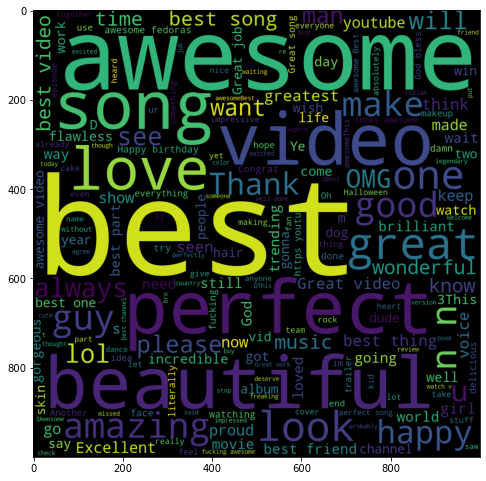

In [18]:
plt.figure(figsize=(8,10))
plt.imshow(word_cloud);

This shows that when the user has positve sentiments or comments these are the words that are repeatidly used by the user for this matter awesome and best are the words mostly used by the user.

# #Simi for negative 

In [19]:
comments_negative=comments[comments['polarity']==-1]

In [20]:
comments_negative.head()

,video_id,comment_text,likes,replies,polarity,sentiment
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0,negative
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0,negative
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0,negative
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0,negative
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0,negative


In [21]:
total_negative_comments=''.join(comments_negative['comment_text'])

In [22]:
word_cloud_neg=WordCloud(height=1000,width=500,stopwords=set(STOPWORDS),background_color='white').generate(total_negative_comments)

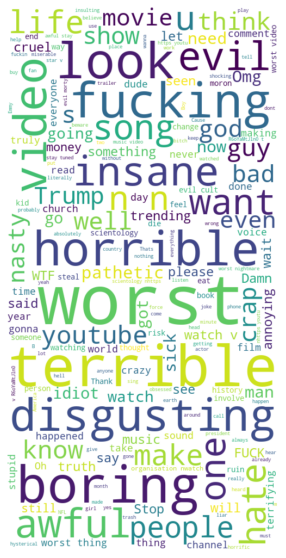

In [23]:
plt.figure(figsize=(8,10),facecolor = None)
plt.imshow(word_cloud_neg,interpolation="bilinear")
plt.axis("off");

This shows that when the user has negative sentiments or comments these are the words that are repeatidly used by the user for this matter terrible,worst and horrible etc are the words mostly used by the user.

# Analyzing tags

In [24]:
videos=pd.read_csv("/Users/mac/Desktop/DataScience/1-Youtube Text Data Analysis/USvideos.csv",error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [25]:
videos.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


In [26]:
tags=videos['tags']

In [27]:
tags

0       logan paul vlog|logan paul|logan|paul|olympics...
1       Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...
2                                                  [none]
3       apple iphone x hands on|Apple iPhone X|iPhone ...
4       jacksfilms|parody|parodies|iphone|iphone x|iph...
                              ...                        
7987    sinkhole|how do sinkholes form|sinkhole in wat...
7988    Business Insider|Donald Trump|Hillary Clinton|...
7989    LP|Death Valley|Other People|Lost On You|The M...
7990    YouTube FanFest|#YTFF|Washington DC|USA|YTFF|#...
7991    LIGO|Virgo|collaboration|space|science|nationa...
Name: tags, Length: 7992, dtype: object

In [28]:
#making a list of tags
tags_complete=''.join(videos['tags'])

In [29]:
videos['tags'][0]

'logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life'

In [30]:
#removing special char
import re

In [31]:
tags=re.sub('[^a-zA-Z]',' ',tags_complete)

In [32]:
#remvoing extra spaces
tags1=re.sub(' +',' ',tags)

In [33]:
word_cloud_tags=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS),background_color='white').generate(tags1)

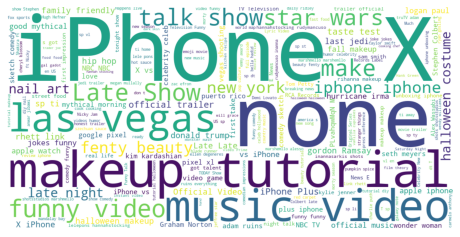

In [34]:
plt.figure(figsize=(8,10))
plt.imshow(word_cloud_tags)
plt.axis('off');

# Analysis on likes and dislikes

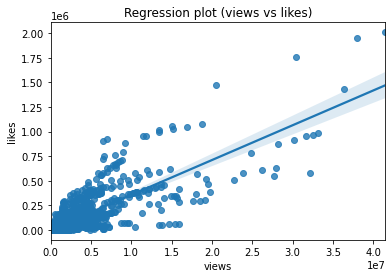

In [35]:
sns.regplot(data=videos,x='views',y='likes')
plt.title("Regression plot (views vs likes)");

It shows that views and likes have strong correlation between them

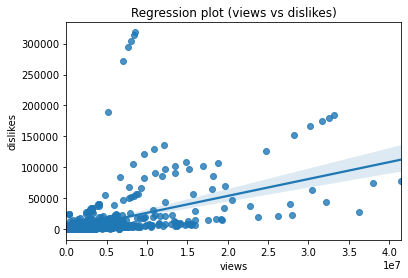

In [36]:
sns.regplot(data=videos,x='views',y='dislikes')
plt.title("Regression plot (views vs dislikes)");

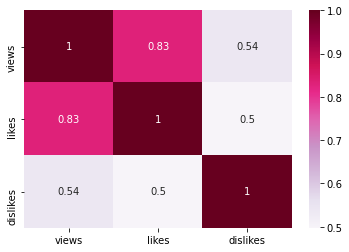

In [37]:
df_corr=videos[['views','likes','dislikes']]
sns.heatmap(df_corr.corr(),annot=True,cmap='PuRd');

# EMOJI ANALYSIS

In [38]:
comments.head()

,video_id,comment_text,likes,replies,polarity,sentiment
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0,neutral
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0,neutral
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0,neutral
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0,neutral
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0,neutral


In [56]:
#for one comment
import emoji
c=comments['comment_text'][4]
[i for i in c if i in emoji.UNICODE_EMOJI]

['😉']

In [57]:
comments['comment_text'].isna().sum()

0

In [58]:
comments['comment_text'].dropna(inplace=True)

In [59]:
str=''
for i in comments['comment_text']:
    list=[c for c in i if c in emoji.UNICODE_EMOJI]
    for ele in list:
        str=str+ele   

In [60]:
len(set(str))

1123

In [61]:
res={i:str.count(i) for i in set(str)}
res

{'🌻': 84,
 '🚊': 5,
 '📅': 11,
 '🔘': 6,
 '👥': 12,
 '⛅': 10,
 '🍭': 89,
 '🌟': 549,
 '🐏': 32,
 '🔄': 5,
 '💏': 32,
 '🎒': 9,
 '😁': 2220,
 '🍦': 73,
 '🌎': 94,
 '🚨': 176,
 '👭': 54,
 '📖': 26,
 '💱': 7,
 '🗡': 19,
 '🛢': 2,
 '🕎': 5,
 '📛': 10,
 '🕷': 35,
 '⏭': 2,
 '🇵': 639,
 '🍶': 29,
 '🆔': 4,
 '📝': 19,
 '🛣': 3,
 '🌪': 24,
 '🛤': 4,
 '🛥': 5,
 '↩': 5,
 '🔌': 14,
 '🏓': 22,
 '💶': 32,
 '🕍': 4,
 '😐': 644,
 '🌙': 41,
 '✋': 99,
 '💸': 235,
 '🕑': 4,
 '🇮': 242,
 '👅': 194,
 '🗾': 6,
 '📦': 17,
 '🏍': 9,
 '💝': 592,
 '🇶': 94,
 '🚽': 25,
 '💉': 14,
 '😱': 2094,
 '🎺': 17,
 '🦍': 4,
 '☘': 8,
 '👛': 14,
 '🕵': 25,
 '🏐': 33,
 '🍱': 16,
 '🍵': 23,
 '🛁': 6,
 '🆚': 4,
 '⏳': 7,
 '📑': 5,
 '📚': 48,
 '🔅': 14,
 '🤭': 1,
 '♂': 507,
 '🎢': 16,
 '◀': 20,
 '🕯': 8,
 '🐽': 23,
 '📋': 5,
 '📽': 11,
 '⛪': 21,
 '❌': 60,
 '🍝': 26,
 '😑': 487,
 '🏒': 7,
 '🇧': 899,
 '🌊': 62,
 '🐶': 325,
 '📏': 17,
 '🚔': 14,
 '🍅': 25,
 '🛀': 11,
 '😈': 393,
 '🌵': 26,
 '🚻': 12,
 '🕰': 6,
 '🍲': 12,
 '🕺': 74,
 '🌭': 19,
 '😨': 335,
 '🐦': 70,
 '🍥': 22,
 '💚': 1295,
 '🛩': 3,
 '🌳': 10,
 '🌃': 13,

In [62]:
#sorting res (dict)
res={k: v for k, v in sorted(res.items(), key=lambda item: item[1])}
res

{'🤭': 1,
 '🤟': 1,
 '🤬': 1,
 '♾': 1,
 '🧢': 1,
 '🤪': 1,
 '🛢': 2,
 '⏭': 2,
 '⏺': 2,
 '🖨': 2,
 '⏯': 2,
 '🖲': 2,
 '☣': 2,
 '⚒': 2,
 '⏹': 2,
 '🤨': 2,
 '🔟': 2,
 '🎏': 2,
 '☦': 2,
 '🗄': 2,
 '⚙': 2,
 '⏸': 2,
 '⚗': 2,
 '🏷': 2,
 '🛣': 3,
 '🛩': 3,
 '🗓': 3,
 '🕹': 3,
 '🗳': 3,
 '🏮': 3,
 '🕳': 3,
 '🖇': 3,
 '🚏': 3,
 '◼': 3,
 '🧐': 3,
 '🗂': 3,
 '☂': 3,
 '🏑': 3,
 '⚛': 3,
 '🗃': 3,
 '🎎': 3,
 '☸': 3,
 '🤺': 3,
 '🚕': 3,
 '🖌': 3,
 '🗞': 3,
 '🔖': 3,
 '➗': 3,
 '🗜': 3,
 '🗒': 3,
 '🛶': 3,
 '⏲': 3,
 '🕉': 3,
 '📴': 3,
 '⛰': 3,
 '◻': 3,
 '◽': 3,
 '💹': 3,
 '🏎': 3,
 '⏮': 3,
 '🔳': 3,
 '🆔': 4,
 '🛤': 4,
 '🕍': 4,
 '🕑': 4,
 '🦍': 4,
 '🆚': 4,
 '🕡': 4,
 '🌫': 4,
 '🕒': 4,
 '🉑': 4,
 '🚃': 4,
 '🏚': 4,
 '🈚': 4,
 '🦏': 4,
 '🛳': 4,
 '🔲': 4,
 '🎞': 4,
 '⛏': 4,
 '🛵': 4,
 '🛃': 4,
 '🎐': 4,
 '🕘': 4,
 '🚎': 4,
 '🚖': 4,
 '🕚': 4,
 '🛫': 4,
 '🚄': 4,
 '⏪': 4,
 '🏛': 4,
 '➿': 4,
 '↖': 4,
 '🥅': 4,
 '🕗': 4,
 '🏖': 4,
 '🎽': 4,
 '🎛': 4,
 '🏤': 4,
 '🈸': 4,
 '🔹': 4,
 '🌥': 4,
 '🎚': 4,
 '🚧': 4,
 '🆖': 4,
 '🚟': 4,
 '⏬': 4,
 '🏔': 4,
 '🔗': 4,
 '🕔': 4,
 '⛓': 4,
 '❔': 4,
 

In [63]:
emoji_keys=[*res.keys()]
emoji_values=[*res.values()]

In [64]:
df=pd.DataFrame({'char':emoji_keys[-20:],'values':emoji_values[-20:]})

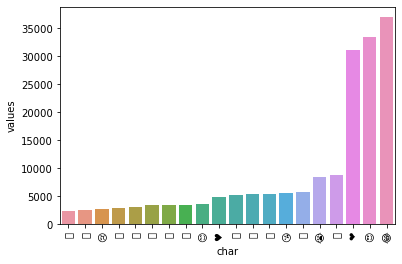

In [71]:
'''trace=go.Bar(x=df['char'],y=df['values'])
iplot([trace])'''
g=sns.barplot(df['char'],df['values'])
g.set_xticklabels(rotation=90,labels=df['char']);